In [1]:
import uproot
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer 
from scipy import constants
from matplotlib import rcParams
import lmfit
import tensorflow as tf
import sklearn
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

In [2]:
# Get the off tree from the file
file = uproot.open("PerfNtuple_merge_ptparam.root:ptParamNt/off")

print("file loaded!!")

# Extracting data
#Extract all possible combinations --> we are going to fit for each one.

combo = []
for event in file.array():
    if event["isReal"] and event["is_barrel"] and event["is_Aside"] and event["phi_index"] == 3:
        combo.append(event["comboName"])

print(combo)
from collections import Counter
# for the fit one needs to get more than x datapoints for a legitimate fit, for example 100 datapoints. That is done with the help of Counter

counts = Counter(combo)  # Count occurrences of each item
print(counts)
combo_list = []
for item, count in counts.items():
    if count > 200:
        combo_list.append(item)
        print(count)
        print(item)

print(combo_list)
# We then need to define the combinations with 3 and 2 sectors, as we will use sagitta and delta beta accordingly. This can be done by counting how long the strings are,
# 3 sectors str>10 2 sectors str<10
combo_list_3_sect = []
combo_list_2_sect = []

for combo in combo_list:
    if len(combo)>10:
        combo_list_3_sect.append(combo)
    else:
        combo_list_2_sect.append(combo)

file loaded!!
['BIL1_BML1_BOL1', 'BIL1_BML1_BOL1', 'BIL2_BML2_BOL2', 'BIL3_BML3_BOL3', 'BIL4_BML5_BOL5', 'BIL2_BML2_BOL2', 'BIL4_BML4_BOL4', 'BIL5_BML5_BOL5', 'BIL5_BML6_BOL5', 'BIL2_BML2', 'BIL1_BML1_BOL1', 'BIL1_BML1_BOL1', 'BIL2_BML2_BOL2', 'BIL3_BOL3', 'BIL1_BML1_BOL1', 'BML1_BOL1', 'BML1_BOL1', 'BIL3_BML3_BOL3', 'BIL3_BML3_BOL3', 'BIL3_BML3_BOL3', 'BIL6_BML6_BOL6', 'BML1_BOL1', 'BIL4_BML4_BOL4', 'BIL3_BML3_BOL3', 'BIL3_BML3_BOL3', 'BIL4_BML4_BOL4', 'BIL2_BML2_BOL2', 'BIL1_BML1', 'BIL4_BML4', 'BIL5_BML5_BOL5', 'BML3_BOL4', 'BIL5_BML6_BOL5', 'BIL3_BML3_BOL3', 'BIL4_BML3_BOL4', 'BIL6_BML6', 'BIL6_BML6_BOL6', 'BIL5_BML5_BOL5', 'BIL4_BML4_BOL5', 'BIL3_BML2_BOL3', 'BIL2_BML2_BOL2', 'BIL4_BML4_BOL4', 'BIL1_BML1_BOL1', 'BIL1_BML1_BOL1', 'BIL3_BML3_BOL3', 'BIL3_BOL3', 'BIL4_BML4_BOL4', 'BIL2_BML2_BOL2', 'BML3_BOL3', 'BIL2_BML2', 'BIL3_BML3_BOL3', 'BIL4_BML4_BOL4', 'BIL4_BML4', 'BIL1_BML1_BOL1', 'BIL3_BML3_BOL3', 'BIL3_BML3', 'BIL1_BML1_BOL1', 'BIL4_BML4_BOL4', 'BIL4_BML5_BOL5', 'BIL1_BML1_

In [3]:
#dictionary with lists 
# Dictionary with lists 
lists_delta_beta = {}
for i, combination in enumerate(combo_list_2_sect):
    lists_delta_beta[f"list_r_delta_beta_{i}"] = []
    lists_delta_beta[f"list_y_delta_beta_{i}"] = []
    lists_delta_beta[f"list_z_delta_beta_{i}"] = []
    lists_delta_beta[f"list_beta_delta_beta_{i}"] = []
    lists_delta_beta[f"list_phi_mod_delta_beta_{i}"] = []
    lists_delta_beta[f"list_eta_delta_beta_{i}"] = []
lists_sagitta = {}
for i, combination in enumerate(combo_list_3_sect):
    lists_sagitta[f"list_r_sagitta_{i}"] = []
    lists_sagitta[f"list_y_sagitta_{i}"] = []
    lists_sagitta[f"list_z_sagitta_{i}"] = []
    lists_sagitta[f"list_beta_sagitta_{i}"] = []
    lists_sagitta[f"list_phi_mod_sagitta_{i}"] = []
    lists_sagitta[f"list_eta_sagitta_{i}"] = []

 
# Appending values for each scenario 
for event in file.array():
    if event["isReal"] and event["is_barrel"] and event["is_Aside"] and event["phi_index"] == 3:
        combination = event["comboName"]
        if combination in combo_list_2_sect and event["is_two_station"]:
            #if event["pt"] > 10.0: 
                index1 = combo_list_2_sect.index(combination)
                r_values_b = []
                for j in event.r:
                     if j == -99:
                          pass
                     else: r_values_b.append(j)
                z_values_b = []
                for j in event.z:
                     if j == -99:
                          pass
                     else: z_values_b.append(j)
                beta_values_b = []
                for j in event.beta:
                     if j == -99:
                          pass
                     else: beta_values_b.append(j)
                lists_delta_beta[f"list_r_delta_beta_{index1}"].append(r_values_b)
                lists_delta_beta[f"list_y_delta_beta_{index1}"].append(event['pt'])
                lists_delta_beta[f"list_z_delta_beta_{index1}"].append(z_values_b)
                lists_delta_beta[f"list_beta_delta_beta_{index1}"].append(beta_values_b)
                lists_delta_beta[f"list_phi_mod_delta_beta_{index1}"].append(event['phi_mod'])
                lists_delta_beta[f"list_eta_delta_beta_{index1}"].append(event['eta'])


        elif combination in combo_list_3_sect and event["is_three_station"]:
            #if event["pt"] > 10.0: 
                index2 = combo_list_3_sect.index(combination)
                r_values = []
                for j in event.r:
                     if j == -99:
                          pass
                     else: r_values.append(j)
                z_values= []
                for j in event.z:
                     if j == -99:
                          pass
                     else: z_values.append(j)
                beta_values = []
                for j in event.beta:
                     if j == -99:
                          pass
                     else: beta_values.append(j)
                lists_sagitta[f"list_r_sagitta_{index2}"].append(r_values)
                lists_sagitta[f"list_y_sagitta_{index2}"].append(float(event["pt"]))
                lists_sagitta[f"list_z_sagitta_{index2}"].append(z_values)
                lists_sagitta[f"list_beta_sagitta_{index2}"].append(beta_values)
                lists_sagitta[f"list_phi_mod_sagitta_{index2}"].append(event['phi_mod'])
                lists_sagitta[f"list_eta_sagitta_{index2}"].append(event['eta'])

In [4]:
# Get the off tree from the file
file_2 = uproot.open("zmumu.root:ptParamNt/off")

print("file loaded!!")

# Assuming you have the list of events in file_2.array()
# Here is a mock of what file_2.array() might look like:


# Provided combo names and values
combo_names = [
    "BIL1_BML1_BOL1", "BIL2_BML2_BOL2", "BIL3_BML3_BOL3", "BIL4_BML5_BOL5", "BIL4_BML4_BOL4",
    "BIL5_BML5_BOL5", "BIL5_BML6_BOL5", "BIL2_BML2", "BIL3_BOL3", "BML1_BOL1", "BIL6_BML6_BOL6",
    "BIL1_BML1", "BIL4_BML4", "BML3_BOL4", "BIL4_BML3_BOL4", "BIL6_BML6", "BIL4_BML4_BOL5",
    "BIL3_BML2_BOL3", "BIL3_BML3", "BIL2_BOL2", "BIL5_BML6_BOL6", "BIL4_BOL4", "BIL1_BML1_BOL2",
    "BIL1_BOL1", "BIL2_BML2_BOL3", "BIL6_BOL6", "BIL3_BML3_BOL4", "BIL5_BOL5", "BIL5_BML5",
    "BIL6_BML6_BOL5", "BIL4_BML3", "BIL3_BML2_BOL2"
]

# List to hold the combo names that match the conditions
combo_2 = []

# Iterate through each event
for event in file_2.array():
    if event["isReal"] and event["is_barrel"] and event["is_Aside"] and event["phi_index"] == 3:
        if event["comboName"] in combo_names:
            combo_2.append(event["comboName"])

# Print the results
print(combo_2)


print(combo_2)
from collections import Counter
# for the fit one needs to get more than x datapoints for a legitimate fit, for example 100 datapoints. That is done with the help of Counter

counts_2 = Counter(combo_2)  # Count occurrences of each item
print(counts_2)
combo_list_2 = []
for item, count in counts_2.items():
    if count > 0:
        combo_list_2.append(item)
        print(count)
        print(item)

print(combo_list_2)
# We then need to define the combinations with 3 and 2 sectors, as we will use sagitta and delta beta accordingly. This can be done by counting how long the strings are,
# 3 sectors str>10 2 sectors str<10
combo_list_3_sect_2 = []
combo_list_2_sect_2 = []

for combo in combo_list_2:
    if len(combo)>10:
        combo_list_3_sect_2.append(combo)
    else:
        combo_list_2_sect_2.append(combo)

file loaded!!
['BIL4_BML4', 'BIL4_BOL4', 'BIL3_BOL3', 'BIL2_BML2_BOL2', 'BIL6_BML6_BOL6', 'BIL6_BML6_BOL6', 'BIL4_BML4_BOL5', 'BIL4_BML4', 'BIL3_BML3_BOL3', 'BIL2_BML2_BOL2', 'BIL1_BML1', 'BIL1_BML1_BOL1', 'BIL3_BML3_BOL3', 'BIL3_BOL3', 'BIL2_BML2', 'BIL2_BML2_BOL2', 'BIL4_BML4', 'BIL2_BML2_BOL2', 'BIL6_BML6_BOL6', 'BIL1_BML1_BOL1', 'BIL1_BML1_BOL1', 'BIL3_BML3_BOL3', 'BIL5_BOL5', 'BIL3_BML3', 'BIL5_BML5_BOL5', 'BML1_BOL1', 'BIL3_BML3_BOL3', 'BIL3_BML3_BOL3', 'BML1_BOL1', 'BIL2_BML2_BOL2', 'BIL2_BML2_BOL2', 'BIL2_BML2_BOL2', 'BIL4_BML4_BOL4', 'BML3_BOL4', 'BIL4_BML4_BOL5', 'BIL3_BML2_BOL3', 'BIL3_BOL3', 'BIL1_BML1_BOL1', 'BIL2_BML2', 'BML3_BOL4', 'BIL6_BOL6', 'BIL1_BML1_BOL1', 'BIL1_BML1_BOL1', 'BIL5_BML5_BOL5', 'BIL1_BML1_BOL1', 'BIL2_BML2', 'BIL3_BOL3', 'BIL1_BML1_BOL1', 'BIL5_BOL5', 'BIL2_BML2', 'BIL6_BOL6', 'BIL4_BML4', 'BIL4_BOL4', 'BIL3_BOL3', 'BIL2_BOL2', 'BIL3_BML3_BOL3', 'BIL3_BML3_BOL4', 'BIL2_BML2_BOL2', 'BIL3_BML3_BOL4', 'BIL2_BOL2', 'BIL4_BML4_BOL4', 'BIL4_BML4_BOL4', 'BIL

In [5]:
#dictionary with lists 
# Dictionary with lists 
lists_delta_beta_2 = {}
for i, combination in enumerate(combo_list_2_sect_2):
    lists_delta_beta_2[f"list_r_delta_beta_{i}"] = []
    lists_delta_beta_2[f"list_y_delta_beta_{i}"] = []
    lists_delta_beta_2[f"list_z_delta_beta_{i}"] = []
    lists_delta_beta_2[f"list_beta_delta_beta_{i}"] = []
    lists_delta_beta_2[f"list_phi_mod_delta_beta_{i}"] = []
    lists_delta_beta_2[f"list_eta_delta_beta_{i}"] = []
    
lists_sagitta_2 = {}
for i, combination in enumerate(combo_list_3_sect_2):
    lists_sagitta_2[f"list_r_sagitta_{i}"] = []
    lists_sagitta_2[f"list_y_sagitta_{i}"] = []
    lists_sagitta_2[f"list_z_sagitta_{i}"] = []
    lists_sagitta_2[f"list_beta_sagitta_{i}"] = []
    lists_sagitta_2[f"list_phi_mod_sagitta_{i}"] = []
    lists_sagitta_2[f"list_eta_sagitta_{i}"] = []

 
# Appending values for each scenario 
for event in file_2.array():
    if event["isReal"] and event["is_barrel"] and event["is_Aside"] and event["phi_index"] == 3:
        combination = event["comboName"]
        if combination in combo_list_2_sect_2 and event["is_two_station"]:
            #if event["pt"] > 10.0: 
                index1 = combo_list_2_sect_2.index(combination)
                r_values_b = []
                for j in event.r:
                     if j == -99:
                          pass
                     else: r_values_b.append(j)
                z_values_b = []
                for j in event.z:
                     if j == -99:
                          pass
                     else: z_values_b.append(j)
                beta_values_b = []
                for j in event.beta:
                     if j == -99:
                          pass
                     else: beta_values_b.append(j)
                lists_delta_beta_2[f"list_r_delta_beta_{index1}"].append(r_values_b)
                lists_delta_beta_2[f"list_y_delta_beta_{index1}"].append(event['pt'])
                lists_delta_beta_2[f"list_z_delta_beta_{index1}"].append(z_values_b)
                lists_delta_beta_2[f"list_beta_delta_beta_{index1}"].append(beta_values_b)
                lists_delta_beta_2[f"list_phi_mod_delta_beta_{index1}"].append(event['phi_mod'])
                lists_delta_beta_2[f"list_eta_delta_beta_{index1}"].append(event['eta'])


        elif combination in combo_list_3_sect_2 and event["is_three_station"]:
            #if event["pt"] > 10.0: 
                index2 = combo_list_3_sect_2.index(combination)
                r_values = []
                for j in event.r:
                     if j == -99:
                          pass
                     else: r_values.append(j)
                z_values= []
                for j in event.z:
                     if j == -99:
                          pass
                     else: z_values.append(j)
                beta_values = []
                for j in event.beta:
                     if j == -99:
                          pass
                     else: beta_values.append(j)
                lists_sagitta_2[f"list_r_sagitta_{index2}"].append(r_values)
                lists_sagitta_2[f"list_y_sagitta_{index2}"].append(float(event["pt"]))
                lists_sagitta_2[f"list_z_sagitta_{index2}"].append(z_values)
                lists_sagitta_2[f"list_beta_sagitta_{index2}"].append(beta_values)
                lists_sagitta_2[f"list_phi_mod_sagitta_{index2}"].append(event['phi_mod'])
                lists_sagitta_2[f"list_eta_sagitta_{index2}"].append(event['eta'])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

class LossNormalizationCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossNormalizationCallback, self).__init__()
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
combined_list_r = np.concatenate((lists_sagitta[f"list_r_sagitta_{0}"], lists_sagitta[f"list_r_sagitta_{1}"], lists_sagitta[f"list_r_sagitta_{2}"], lists_sagitta[f"list_r_sagitta_{3}"], lists_sagitta[f"list_r_sagitta_{4}"], lists_sagitta[f"list_r_sagitta_{5}"], lists_sagitta[f"list_r_sagitta_{6}"], lists_sagitta[f"list_r_sagitta_{7}"], lists_sagitta[f"list_r_sagitta_{8}"], lists_sagitta[f"list_r_sagitta_{9}"], lists_sagitta[f"list_r_sagitta_{10}"],\
                              lists_sagitta[f"list_r_sagitta_{10}"], lists_sagitta[f"list_r_sagitta_{11}"], lists_sagitta[f"list_r_sagitta_{12}"], lists_sagitta[f"list_r_sagitta_{13}"], lists_sagitta[f"list_r_sagitta_{14}"],lists_sagitta[f"list_r_sagitta_{15}"], lists_sagitta[f"list_r_sagitta_{16}"]), axis = 0)
combined_list_r_delta_beta = np.concatenate((lists_delta_beta[f"list_r_delta_beta_{0}"], lists_delta_beta[f"list_r_delta_beta_{1}"], lists_delta_beta[f"list_r_delta_beta_{2}"], lists_delta_beta[f"list_r_delta_beta_{3}"], lists_delta_beta[f"list_r_delta_beta_{4}"], lists_delta_beta[f"list_r_delta_beta_{5}"], lists_delta_beta[f"list_r_delta_beta_{6}"], lists_delta_beta[f"list_r_delta_beta_{7}"], lists_delta_beta[f"list_r_delta_beta_{8}"], lists_delta_beta[f"list_r_delta_beta_{9}"], lists_delta_beta[f"list_r_delta_beta_{10}"],\
                              lists_delta_beta[f"list_r_delta_beta_{10}"], lists_delta_beta[f"list_r_delta_beta_{11}"], lists_delta_beta[f"list_r_delta_beta_{12}"], lists_delta_beta[f"list_r_delta_beta_{13}"], lists_delta_beta[f"list_r_delta_beta_{14}"]), axis = 0)
combined_list_z_delta_beta = np.concatenate((lists_delta_beta[f"list_z_delta_beta_{0}"], lists_delta_beta[f"list_z_delta_beta_{1}"], lists_delta_beta[f"list_z_delta_beta_{2}"], lists_delta_beta[f"list_z_delta_beta_{3}"], lists_delta_beta[f"list_z_delta_beta_{4}"], lists_delta_beta[f"list_z_delta_beta_{5}"], lists_delta_beta[f"list_z_delta_beta_{6}"], lists_delta_beta[f"list_z_delta_beta_{7}"], lists_delta_beta[f"list_z_delta_beta_{8}"], lists_delta_beta[f"list_z_delta_beta_{9}"], lists_delta_beta[f"list_z_delta_beta_{10}"],\
                              lists_delta_beta[f"list_z_delta_beta_{10}"], lists_delta_beta[f"list_z_delta_beta_{11}"], lists_delta_beta[f"list_z_delta_beta_{12}"], lists_delta_beta[f"list_z_delta_beta_{13}"], lists_delta_beta[f"list_z_delta_beta_{14}"]), axis = 0)
combined_list_beta_delta_beta = np.concatenate((lists_delta_beta[f"list_beta_delta_beta_{0}"], lists_delta_beta[f"list_beta_delta_beta_{1}"], lists_delta_beta[f"list_beta_delta_beta_{2}"], lists_delta_beta[f"list_beta_delta_beta_{3}"], lists_delta_beta[f"list_beta_delta_beta_{4}"], lists_delta_beta[f"list_beta_delta_beta_{5}"], lists_delta_beta[f"list_beta_delta_beta_{6}"], lists_delta_beta[f"list_beta_delta_beta_{7}"], lists_delta_beta[f"list_beta_delta_beta_{8}"], lists_delta_beta[f"list_beta_delta_beta_{9}"], lists_delta_beta[f"list_beta_delta_beta_{10}"],\
                              lists_delta_beta[f"list_beta_delta_beta_{10}"], lists_delta_beta[f"list_beta_delta_beta_{11}"], lists_delta_beta[f"list_beta_delta_beta_{12}"], lists_delta_beta[f"list_beta_delta_beta_{13}"], lists_delta_beta[f"list_beta_delta_beta_{14}"]), axis = 0)
combined_list_z_sagitta = np.concatenate((lists_sagitta[f"list_z_sagitta_{0}"], lists_sagitta[f"list_z_sagitta_{1}"], lists_sagitta[f"list_z_sagitta_{2}"], lists_sagitta[f"list_z_sagitta_{3}"], lists_sagitta[f"list_z_sagitta_{4}"], lists_sagitta[f"list_z_sagitta_{5}"], lists_sagitta[f"list_z_sagitta_{6}"], lists_sagitta[f"list_z_sagitta_{7}"], lists_sagitta[f"list_z_sagitta_{8}"], lists_sagitta[f"list_z_sagitta_{9}"], lists_sagitta[f"list_z_sagitta_{10}"],\
                              lists_sagitta[f"list_z_sagitta_{10}"], lists_sagitta[f"list_z_sagitta_{11}"], lists_sagitta[f"list_z_sagitta_{12}"], lists_sagitta[f"list_z_sagitta_{13}"], lists_sagitta[f"list_z_sagitta_{14}"],lists_sagitta[f"list_z_sagitta_{15}"], lists_sagitta[f"list_z_sagitta_{16}"]), axis = 0)
combined_list_beta_sagitta = np.concatenate((lists_sagitta[f"list_beta_sagitta_{0}"], lists_sagitta[f"list_beta_sagitta_{1}"], lists_sagitta[f"list_beta_sagitta_{2}"], lists_sagitta[f"list_beta_sagitta_{3}"], lists_sagitta[f"list_beta_sagitta_{4}"], lists_sagitta[f"list_beta_sagitta_{5}"], lists_sagitta[f"list_beta_sagitta_{6}"], lists_sagitta[f"list_beta_sagitta_{7}"], lists_sagitta[f"list_beta_sagitta_{8}"], lists_sagitta[f"list_beta_sagitta_{9}"], lists_sagitta[f"list_beta_sagitta_{10}"],\
                              lists_sagitta[f"list_beta_sagitta_{10}"], lists_sagitta[f"list_beta_sagitta_{11}"], lists_sagitta[f"list_beta_sagitta_{12}"], lists_sagitta[f"list_beta_sagitta_{13}"], lists_sagitta[f"list_beta_sagitta_{14}"],lists_sagitta[f"list_beta_sagitta_{15}"], lists_sagitta[f"list_beta_sagitta_{16}"]), axis = 0)
combined_list_phi_mod_sagitta = np.concatenate((lists_sagitta[f"list_phi_mod_sagitta_{0}"], lists_sagitta[f"list_phi_mod_sagitta_{1}"], lists_sagitta[f"list_phi_mod_sagitta_{2}"], lists_sagitta[f"list_phi_mod_sagitta_{3}"], lists_sagitta[f"list_phi_mod_sagitta_{4}"], lists_sagitta[f"list_phi_mod_sagitta_{5}"], lists_sagitta[f"list_phi_mod_sagitta_{6}"], lists_sagitta[f"list_phi_mod_sagitta_{7}"], lists_sagitta[f"list_phi_mod_sagitta_{8}"], lists_sagitta[f"list_phi_mod_sagitta_{9}"], lists_sagitta[f"list_phi_mod_sagitta_{10}"],\
                              lists_sagitta[f"list_phi_mod_sagitta_{10}"], lists_sagitta[f"list_phi_mod_sagitta_{11}"], lists_sagitta[f"list_phi_mod_sagitta_{12}"], lists_sagitta[f"list_phi_mod_sagitta_{13}"], lists_sagitta[f"list_phi_mod_sagitta_{14}"],lists_sagitta[f"list_phi_mod_sagitta_{15}"], lists_sagitta[f"list_phi_mod_sagitta_{16}"]), axis = 0)
combined_list_eta_sagitta = np.concatenate((lists_sagitta[f"list_eta_sagitta_{0}"], lists_sagitta[f"list_eta_sagitta_{1}"], lists_sagitta[f"list_eta_sagitta_{2}"], lists_sagitta[f"list_eta_sagitta_{3}"], lists_sagitta[f"list_eta_sagitta_{4}"], lists_sagitta[f"list_eta_sagitta_{5}"], lists_sagitta[f"list_eta_sagitta_{6}"], lists_sagitta[f"list_eta_sagitta_{7}"], lists_sagitta[f"list_eta_sagitta_{8}"], lists_sagitta[f"list_eta_sagitta_{9}"], lists_sagitta[f"list_eta_sagitta_{10}"],\
                              lists_sagitta[f"list_eta_sagitta_{10}"], lists_sagitta[f"list_eta_sagitta_{11}"], lists_sagitta[f"list_eta_sagitta_{12}"], lists_sagitta[f"list_eta_sagitta_{13}"], lists_sagitta[f"list_eta_sagitta_{14}"],lists_sagitta[f"list_eta_sagitta_{15}"], lists_sagitta[f"list_eta_sagitta_{16}"]), axis = 0)
combined_list_y_sagitta = np.concatenate((lists_sagitta[f"list_y_sagitta_{0}"], lists_sagitta[f"list_y_sagitta_{1}"], lists_sagitta[f"list_y_sagitta_{2}"], lists_sagitta[f"list_y_sagitta_{3}"], lists_sagitta[f"list_y_sagitta_{4}"], lists_sagitta[f"list_y_sagitta_{5}"], lists_sagitta[f"list_y_sagitta_{6}"], lists_sagitta[f"list_y_sagitta_{7}"], lists_sagitta[f"list_y_sagitta_{8}"], lists_sagitta[f"list_y_sagitta_{9}"], lists_sagitta[f"list_y_sagitta_{10}"],\
                              lists_sagitta[f"list_y_sagitta_{10}"], lists_sagitta[f"list_y_sagitta_{11}"], lists_sagitta[f"list_y_sagitta_{12}"], lists_sagitta[f"list_y_sagitta_{13}"], lists_sagitta[f"list_y_sagitta_{14}"],lists_sagitta[f"list_y_sagitta_{15}"], lists_sagitta[f"list_y_sagitta_{16}"]), axis = 0)
combined_list_y_beta = np.concatenate((lists_delta_beta[f"list_y_delta_beta_{0}"], lists_delta_beta[f"list_y_delta_beta_{1}"], lists_delta_beta[f"list_y_delta_beta_{2}"], lists_delta_beta[f"list_y_delta_beta_{3}"], lists_delta_beta[f"list_y_delta_beta_{4}"], lists_delta_beta[f"list_y_delta_beta_{5}"], lists_delta_beta[f"list_y_delta_beta_{6}"], lists_delta_beta[f"list_y_delta_beta_{7}"], lists_delta_beta[f"list_y_delta_beta_{8}"], lists_delta_beta[f"list_y_delta_beta_{9}"], lists_delta_beta[f"list_y_delta_beta_{10}"],\
                              lists_delta_beta[f"list_y_delta_beta_{10}"], lists_delta_beta[f"list_y_delta_beta_{11}"], lists_delta_beta[f"list_y_delta_beta_{12}"], lists_delta_beta[f"list_y_delta_beta_{13}"], lists_delta_beta[f"list_y_delta_beta_{14}"]), axis = 0)
combined_r = combined_list_r # + combined_list_r_delta_beta
combined_y = combined_list_y_sagitta #+ combined_list_y_beta
combined_z = combined_list_z_sagitta #+ combined_list_z_delta_beta 
combined_beta = combined_list_beta_sagitta#+ combined_list_beta_delta_beta 
combined_phi_mod = combined_list_phi_mod_sagitta #+ beta
combined_eta = combined_list_eta_sagitta #+ beta

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

class LossNormalizationCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossNormalizationCallback, self).__init__()
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
combined_list_r_2 = np.concatenate((lists_sagitta_2[f"list_r_sagitta_{0}"], lists_sagitta_2[f"list_r_sagitta_{1}"], lists_sagitta_2[f"list_r_sagitta_{2}"], lists_sagitta_2[f"list_r_sagitta_{3}"], lists_sagitta_2[f"list_r_sagitta_{4}"], lists_sagitta_2[f"list_r_sagitta_{5}"], lists_sagitta_2[f"list_r_sagitta_{6}"], lists_sagitta_2[f"list_r_sagitta_{7}"], lists_sagitta_2[f"list_r_sagitta_{8}"], lists_sagitta_2[f"list_r_sagitta_{9}"], lists_sagitta_2[f"list_r_sagitta_{10}"],\
                              lists_sagitta_2[f"list_r_sagitta_{10}"], lists_sagitta_2[f"list_r_sagitta_{11}"], lists_sagitta_2[f"list_r_sagitta_{12}"], lists_sagitta_2[f"list_r_sagitta_{13}"], lists_sagitta_2[f"list_r_sagitta_{14}"],lists_sagitta_2[f"list_r_sagitta_{15}"], lists_sagitta_2[f"list_r_sagitta_{16}"]), axis = 0)
combined_list_r_delta_beta_2 = np.concatenate((lists_delta_beta_2[f"list_r_delta_beta_{0}"], lists_delta_beta_2[f"list_r_delta_beta_{1}"], lists_delta_beta_2[f"list_r_delta_beta_{2}"], lists_delta_beta_2[f"list_r_delta_beta_{3}"], lists_delta_beta_2[f"list_r_delta_beta_{4}"], lists_delta_beta_2[f"list_r_delta_beta_{5}"], lists_delta_beta_2[f"list_r_delta_beta_{6}"], lists_delta_beta_2[f"list_r_delta_beta_{7}"], lists_delta_beta_2[f"list_r_delta_beta_{8}"], lists_delta_beta_2[f"list_r_delta_beta_{9}"], lists_delta_beta_2[f"list_r_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_r_delta_beta_{10}"], lists_delta_beta_2[f"list_r_delta_beta_{11}"], lists_delta_beta_2[f"list_r_delta_beta_{12}"], lists_delta_beta_2[f"list_r_delta_beta_{13}"], lists_delta_beta_2[f"list_r_delta_beta_{14}"]), axis = 0)
combined_list_z_delta_beta_2 = np.concatenate((lists_delta_beta_2[f"list_z_delta_beta_{0}"], lists_delta_beta_2[f"list_z_delta_beta_{1}"], lists_delta_beta_2[f"list_z_delta_beta_{2}"], lists_delta_beta_2[f"list_z_delta_beta_{3}"], lists_delta_beta_2[f"list_z_delta_beta_{4}"], lists_delta_beta_2[f"list_z_delta_beta_{5}"], lists_delta_beta_2[f"list_z_delta_beta_{6}"], lists_delta_beta_2[f"list_z_delta_beta_{7}"], lists_delta_beta_2[f"list_z_delta_beta_{8}"], lists_delta_beta_2[f"list_z_delta_beta_{9}"], lists_delta_beta_2[f"list_z_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_z_delta_beta_{10}"], lists_delta_beta_2[f"list_z_delta_beta_{11}"], lists_delta_beta_2[f"list_z_delta_beta_{12}"], lists_delta_beta_2[f"list_z_delta_beta_{13}"], lists_delta_beta_2[f"list_z_delta_beta_{14}"]), axis = 0)
combined_list_beta_delta_beta_2 = np.concatenate((lists_delta_beta_2[f"list_beta_delta_beta_{0}"], lists_delta_beta_2[f"list_beta_delta_beta_{1}"], lists_delta_beta_2[f"list_beta_delta_beta_{2}"], lists_delta_beta_2[f"list_beta_delta_beta_{3}"], lists_delta_beta_2[f"list_beta_delta_beta_{4}"], lists_delta_beta_2[f"list_beta_delta_beta_{5}"], lists_delta_beta_2[f"list_beta_delta_beta_{6}"], lists_delta_beta_2[f"list_beta_delta_beta_{7}"], lists_delta_beta_2[f"list_beta_delta_beta_{8}"], lists_delta_beta_2[f"list_beta_delta_beta_{9}"], lists_delta_beta_2[f"list_beta_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_beta_delta_beta_{10}"], lists_delta_beta_2[f"list_beta_delta_beta_{11}"], lists_delta_beta_2[f"list_beta_delta_beta_{12}"], lists_delta_beta_2[f"list_beta_delta_beta_{13}"], lists_delta_beta_2[f"list_beta_delta_beta_{14}"]), axis = 0)
combined_list_z_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_z_sagitta_{0}"], lists_sagitta_2[f"list_z_sagitta_{1}"], lists_sagitta_2[f"list_z_sagitta_{2}"], lists_sagitta_2[f"list_z_sagitta_{3}"], lists_sagitta_2[f"list_z_sagitta_{4}"], lists_sagitta_2[f"list_z_sagitta_{5}"], lists_sagitta_2[f"list_z_sagitta_{6}"], lists_sagitta_2[f"list_z_sagitta_{7}"], lists_sagitta_2[f"list_z_sagitta_{8}"], lists_sagitta_2[f"list_z_sagitta_{9}"], lists_sagitta_2[f"list_z_sagitta_{10}"],\
                              lists_sagitta_2[f"list_z_sagitta_{10}"], lists_sagitta_2[f"list_z_sagitta_{11}"], lists_sagitta_2[f"list_z_sagitta_{12}"], lists_sagitta_2[f"list_z_sagitta_{13}"], lists_sagitta_2[f"list_z_sagitta_{14}"],lists_sagitta_2[f"list_z_sagitta_{15}"], lists_sagitta_2[f"list_z_sagitta_{16}"]), axis = 0)
combined_list_beta_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_beta_sagitta_{0}"], lists_sagitta_2[f"list_beta_sagitta_{1}"], lists_sagitta_2[f"list_beta_sagitta_{2}"], lists_sagitta_2[f"list_beta_sagitta_{3}"], lists_sagitta_2[f"list_beta_sagitta_{4}"], lists_sagitta_2[f"list_beta_sagitta_{5}"], lists_sagitta_2[f"list_beta_sagitta_{6}"], lists_sagitta_2[f"list_beta_sagitta_{7}"], lists_sagitta_2[f"list_beta_sagitta_{8}"], lists_sagitta_2[f"list_beta_sagitta_{9}"], lists_sagitta_2[f"list_beta_sagitta_{10}"],\
                              lists_sagitta_2[f"list_beta_sagitta_{10}"], lists_sagitta_2[f"list_beta_sagitta_{11}"], lists_sagitta_2[f"list_beta_sagitta_{12}"], lists_sagitta_2[f"list_beta_sagitta_{13}"], lists_sagitta_2[f"list_beta_sagitta_{14}"],lists_sagitta_2[f"list_beta_sagitta_{15}"], lists_sagitta_2[f"list_beta_sagitta_{16}"]), axis = 0)
combined_list_phi_mod_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_phi_mod_sagitta_{0}"], lists_sagitta_2[f"list_phi_mod_sagitta_{1}"], lists_sagitta_2[f"list_phi_mod_sagitta_{2}"], lists_sagitta_2[f"list_phi_mod_sagitta_{3}"], lists_sagitta_2[f"list_phi_mod_sagitta_{4}"], lists_sagitta_2[f"list_phi_mod_sagitta_{5}"], lists_sagitta_2[f"list_phi_mod_sagitta_{6}"], lists_sagitta_2[f"list_phi_mod_sagitta_{7}"], lists_sagitta_2[f"list_phi_mod_sagitta_{8}"], lists_sagitta_2[f"list_phi_mod_sagitta_{9}"], lists_sagitta_2[f"list_phi_mod_sagitta_{10}"],\
                              lists_sagitta_2[f"list_phi_mod_sagitta_{10}"], lists_sagitta_2[f"list_phi_mod_sagitta_{11}"], lists_sagitta_2[f"list_phi_mod_sagitta_{12}"], lists_sagitta_2[f"list_phi_mod_sagitta_{13}"], lists_sagitta_2[f"list_phi_mod_sagitta_{14}"],lists_sagitta_2[f"list_phi_mod_sagitta_{15}"], lists_sagitta_2[f"list_phi_mod_sagitta_{16}"]), axis = 0)
combined_list_eta_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_eta_sagitta_{0}"], lists_sagitta_2[f"list_eta_sagitta_{1}"], lists_sagitta_2[f"list_eta_sagitta_{2}"], lists_sagitta_2[f"list_eta_sagitta_{3}"], lists_sagitta_2[f"list_eta_sagitta_{4}"], lists_sagitta_2[f"list_eta_sagitta_{5}"], lists_sagitta_2[f"list_eta_sagitta_{6}"], lists_sagitta_2[f"list_eta_sagitta_{7}"], lists_sagitta_2[f"list_eta_sagitta_{8}"], lists_sagitta_2[f"list_eta_sagitta_{9}"], lists_sagitta_2[f"list_eta_sagitta_{10}"],\
                              lists_sagitta_2[f"list_eta_sagitta_{10}"], lists_sagitta_2[f"list_eta_sagitta_{11}"], lists_sagitta_2[f"list_eta_sagitta_{12}"], lists_sagitta_2[f"list_eta_sagitta_{13}"], lists_sagitta_2[f"list_eta_sagitta_{14}"],lists_sagitta_2[f"list_eta_sagitta_{15}"], lists_sagitta_2[f"list_eta_sagitta_{16}"]), axis = 0)
combined_list_y_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_y_sagitta_{0}"], lists_sagitta_2[f"list_y_sagitta_{1}"], lists_sagitta_2[f"list_y_sagitta_{2}"], lists_sagitta_2[f"list_y_sagitta_{3}"], lists_sagitta_2[f"list_y_sagitta_{4}"], lists_sagitta_2[f"list_y_sagitta_{5}"], lists_sagitta_2[f"list_y_sagitta_{6}"], lists_sagitta_2[f"list_y_sagitta_{7}"], lists_sagitta_2[f"list_y_sagitta_{8}"], lists_sagitta_2[f"list_y_sagitta_{9}"], lists_sagitta_2[f"list_y_sagitta_{10}"],\
                              lists_sagitta_2[f"list_y_sagitta_{10}"], lists_sagitta_2[f"list_y_sagitta_{11}"], lists_sagitta_2[f"list_y_sagitta_{12}"], lists_sagitta_2[f"list_y_sagitta_{13}"], lists_sagitta_2[f"list_y_sagitta_{14}"],lists_sagitta_2[f"list_y_sagitta_{15}"], lists_sagitta_2[f"list_y_sagitta_{16}"]), axis = 0)
combined_list_y_beta_2 = np.concatenate((lists_delta_beta_2[f"list_y_delta_beta_{0}"], lists_delta_beta_2[f"list_y_delta_beta_{1}"], lists_delta_beta_2[f"list_y_delta_beta_{2}"], lists_delta_beta_2[f"list_y_delta_beta_{3}"], lists_delta_beta_2[f"list_y_delta_beta_{4}"], lists_delta_beta_2[f"list_y_delta_beta_{5}"], lists_delta_beta_2[f"list_y_delta_beta_{6}"], lists_delta_beta_2[f"list_y_delta_beta_{7}"], lists_delta_beta_2[f"list_y_delta_beta_{8}"], lists_delta_beta_2[f"list_y_delta_beta_{9}"], lists_delta_beta_2[f"list_y_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_y_delta_beta_{10}"], lists_delta_beta_2[f"list_y_delta_beta_{11}"], lists_delta_beta_2[f"list_y_delta_beta_{12}"], lists_delta_beta_2[f"list_y_delta_beta_{13}"], lists_delta_beta_2[f"list_y_delta_beta_{14}"]), axis = 0)
combined_r_2 = combined_list_r_2 # + combined_list_r_delta_beta
combined_y_2 = combined_list_y_sagitta_2 #+ combined_list_y_beta
combined_z_2 = combined_list_z_sagitta_2 #+ combined_list_z_delta_beta 
combined_beta_2 = combined_list_beta_sagitta_2#+ combined_list_beta_delta_beta 
combined_phi_mod_2 = combined_list_phi_mod_sagitta_2 #+ beta
combined_eta_2 = combined_list_eta_sagitta_2 #+ beta

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import SGD


epochs = 600
lr = 0.015
decay_rate = 0.01
momentum = 0.8

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=300 ,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Verbosity mode
    restore_best_weights=True ) # Restore the weights from the best epoch

def exp_decay(epoch):
    if epoch <=18:
        return 0.005
    else:
        lrate = 0.005 * np.exp(-decay_rate*epoch)
        return lrate
    
lr_rate = LearningRateScheduler(exp_decay)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming you have your data in the following variables
# combined_x: list of lists, where each inner list contains three parameters for a data point
# combined_y: list of target values for each data point

# Convert the lists to NumPy arrays


X_1_2 = np.concatenate((combined_r, combined_beta, combined_z), axis = 1)
X_2_2_reshaped = np.array(combined_phi_mod.reshape(-1,1))
X_3_2_reshaped = np.array(combined_eta.reshape(-1,1))
X_2 = np.concatenate((X_1_2, X_2_2_reshaped, X_3_2_reshaped), axis = 1)
scaler = MinMaxScaler()
X_normalized_2 = scaler.fit_transform(X_2)
y_2 = np.array(combined_y)
y_normalized_2 = scaler.fit_transform(y_2.reshape(-1, 1))  # Reshape y to have shape (n_samples, 1)


import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from keras.regularizers import l2

# Prepare the data
X_main_2, X_test_2, y_main_2, y_test_2 = train_test_split(X_normalized_2, y_normalized_2, test_size=0.2, random_state=42) #main because it has validation and training still

# Further split the training set into training and validation sets
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_main_2, y_main_2, test_size=0.2, random_state=42) #now the validation and training


# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Reshape

model_2 = Sequential()
model_2.add(Dense(128, input_shape = (11,)))
model_2.add(LeakyReLU(alpha = 0.2))
model_2.add(Reshape((4, 32)))
# First Conv1D layer with input shape specified
model_2.add(Conv1D(64, 3, padding='same'))
model_2.add(LeakyReLU(alpha=0.2))
model_2.add(MaxPooling1D(pool_size=2))
# Second Conv1D layer
model_2.add(Conv1D(128, 3, padding='same'))
model_2.add(LeakyReLU(alpha=0.2))
model_2.add(MaxPooling1D(pool_size=2))
# Third Conv1D layer
model_2.add(Conv1D(256, 3, padding='same'))
model_2.add(LeakyReLU(alpha=0.2))
# Flatten the output
model_2.add(Flatten())
# Dense layers with Dropout and LeakyReLU
model_2.add(Dense(800))
model_2.add(LeakyReLU(alpha=0.2))
model_2.add(Dropout(0.5))
model_2.add(Dense(400))
model_2.add(LeakyReLU(alpha=0.2))
model_2.add(Dropout(0.5))
model_2.add(Dense(200))
model_2.add(LeakyReLU(alpha=0.2))
# Add batch normalization
model_2.add(BatchNormalization())
# Output layer for regression
model_2.add(Dense(1, activation='linear'))
# Compile the model
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Print model summary
model_2.summary()

# Create a Dataset object from your training data

history_2 = model_2.fit(X_train_2 , y_train_2, epochs=1000, validation_data=(X_val_2, y_val_2), batch_size = 128, shuffle = True, callbacks = [early_stopping, lr_rate])

# Print the normalized losses
print("Normalized Training Losses:")


# Train the model
# Evaluate the model
test_loss_2 = model_2.evaluate(X_test_2, y_test_2)

# Make predictions
predictions_2 = model_2.predict(X_test_2)
y_train_pred = model_2.predict(X_train_2)
y_val_pred = model_2.predict(X_val_2)
# Calculate the variance of the predictions
variance_2 = np.var(predictions_2)

print("Variance of predictions:", variance_2)

/Users/franciscoresende/Desktop/maxplanck_new/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/franciscoresende/Desktop/maxplanck_new/.venv/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 2, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       205,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,209 (2.82 MB)

 Trainable params: 737,809 (2.81 MB)

 Non-trainable params: 400 (1.56 KB)

Epoch 1/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0472 - val_mse: 0.0472 - learning_rate: 0.0050
Epoch 2/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0473 - val_mse: 0.0473 - learning_rate: 0.0050
Epoch 3/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0509 - val_mse: 0.0509 - learning_rate: 0.0050
Epoch 4/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0473 - val_mse: 0.0473 - learning_rate: 0.0050
Epoch 5/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.0494 - val_mse: 0.0494 - learning_rate: 0.0050
Epoch 6/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0481 - val_mse: 0.0481 - learning_rate: 0.0050
Epoch 7/1000
209/209 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0497 - val_mse: 0.0497 - learning_rate:

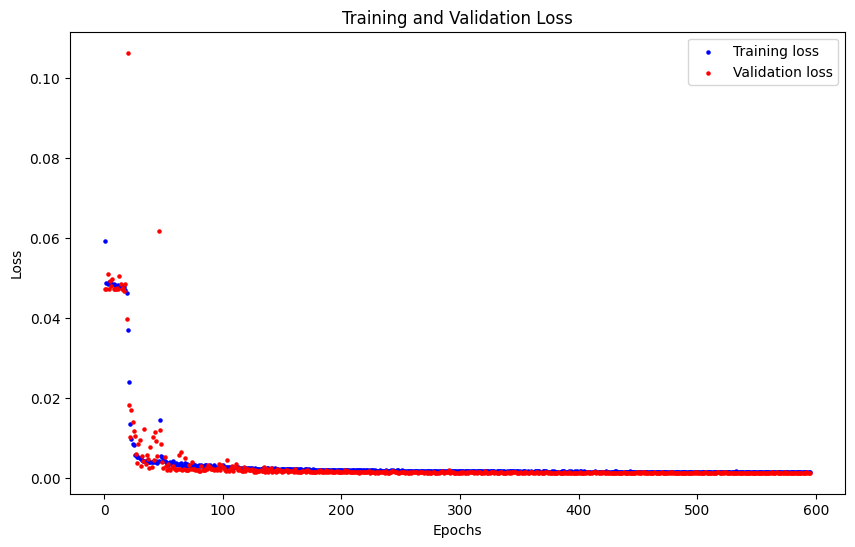

In [9]:
import matplotlib.pyplot as plt

# Assuming 'history_2' is the history object returned by the model's fit method
# Extract loss and validation loss from the history object
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Create epochs range for the x-axis
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(epochs, loss, c='blue', label='Training loss', s = 5)
plt.scatter(epochs, val_loss, c='red', label='Validation loss', s= 5)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



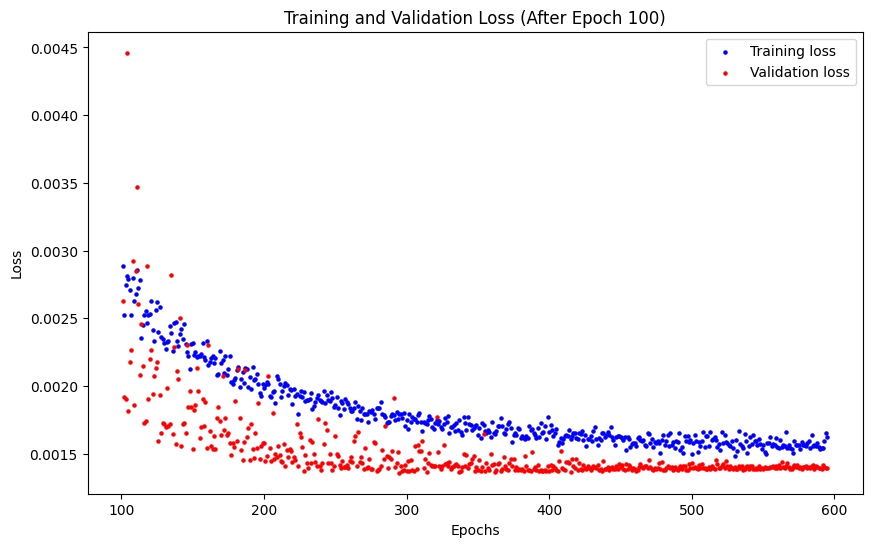

In [10]:
import matplotlib.pyplot as plt

# Assuming 'history_2' is the history object returned by the model's fit method
# Extract loss and validation loss from the history object
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Create epochs range for the x-axis
epochs = range(1, len(loss) + 1)

# Slice the lists to get data after epoch 100
epochs_after_100 = epochs[100:]
loss_after_100 = loss[100:]
val_loss_after_100 = val_loss[100:]

# Plot the training and validation loss using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(epochs_after_100, loss_after_100, c='blue', label='Training loss', s = 5)
plt.scatter(epochs_after_100, val_loss_after_100, c='red', label='Validation loss', s= 5)
plt.title('Training and Validation Loss (After Epoch 100)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
import os
import tempfile
import zipfile
import numpy as np
import tensorflow as tf
import tensorflow_model_optimization as tfmot
from tensorflow.keras.models import load_model, Sequential
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
sparsity = 0.5
#Clone model
sparse_model = tf.keras.models.clone_model(model_2)
#Sparse model
pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(sparsity, 0)
        # 'block_size': (1, 1),
        # 'block_pooling_type': 'AVG'
    }
sparse_model = tfmot.sparsity.keras.prune_low_magnitude(sparse_model, **pruning_params)

sparse_model.compile(optimizer = 'adam',
                loss = 'mse',
                metrics = ['sparse_categorical_accuracy']
                )
sparse_model.fit(X_train_2 , y_train_2, epochs=1000, validation_data=(X_val_2, y_val_2), batch_size = 128, shuffle = True, callbacks = [early_stopping, lr_rate, tfmot.sparsity.keras.UpdatePruningStep()])



# Evaluate the pruned model
test_loss_pruned = sparse_model.evaluate(X_test_2, y_test_2)

# Make predictions with the pruned model
predictions_pruned = sparse_model.predict(X_test_2)

# Calculate the variance of the predictions
variance_pruned = np.var(predictions_pruned)

print("Variance of predictions (pruned model):", variance_pruned)


ValueError: `prune_low_magnitude` can only prune an object of the following types: keras.models.Sequential, keras functional model, keras.layers.Layer, list of keras.layers.Layer. You passed an object of type: Sequential.

In [ ]:
import numpy as np
predictions_reshaped_2 = predictions_2.reshape(-1, 1)

# Inverse transform the scaled data
y_original_scale_test_2 = scaler.inverse_transform(y_test_2)
y_original_scale_predict_2 = scaler.inverse_transform(predictions_reshaped_2)

y_original_scale_train_2 = scaler.inverse_transform(y_train_2)
y_original_scale_predict_train_2 = scaler.inverse_transform(y_train_pred)

y_original_scale_val_2 = scaler.inverse_transform(y_val_2)
y_original_scale_predict_val_2 = scaler.inverse_transform(y_val_pred)

y_predict_together = np.concatenate((y_original_scale_predict_2, y_original_scale_predict_train_2, y_original_scale_predict_val_2), axis=0)
y_test_together = np.concatenate((y_original_scale_test_2, y_original_scale_train_2, y_original_scale_val_2), axis = 0)
# Define the intervals
intervals = [(5, 7.5), (7.5, 10), (10, 12.5), (12.5, 15), (15, 17.5), 
             (17.5, 20.0), (20.0, 22.5), (22.5, 25.0), (25.0, 27.5), 
             (27.5, 30.0), (30.0, 32.5), (32.5, 35.0), (35.0, 37.5), 
             (37.5, 40.0), (40.0, 42.5), (42.5, 45.0), (45.0, 47.5), 
             (47.5, 50.0)]

# Calculate results for each interval
list_of_results_3_2 = [
    [(x - y) / y for x, y in zip(y_original_scale_predict_2, y_original_scale_test_2) if low < y <= high] 
    for low, high in intervals
]

list_of_results_3_2_train = [
    [(x - y) / y for x, y in zip(y_original_scale_predict_train_2, y_original_scale_train_2) if low < y <= high] 
    for low, high in intervals
]

list_of_results_3_2_val = [
    [(x - y) / y for x, y in zip(y_original_scale_predict_val_2, y_original_scale_val_2) if low < y <= high] 
    for low, high in intervals
]
list_of_results_3_2_together = [
    [(x - y) / y for x, y in zip(y_predict_together, y_test_together) if low < y <= high] 
    for low, high in intervals
]

In [ ]:
# Now list_of_results_3_2 contains the results for all defined intervals

weights_list_2 = []
a= 0
print(list_of_results_3_2)
for i in list_of_results_3_2:
    a += len(i)
for i in list_of_results_3_2:
    weights_list_2.append(a/len(i))
stddev_list_3_2_test = []
stddev_list_3_2_train = []
stddev_list_3_2_val = []
stddev_list_3_2_together = []


def gaussian(x, mean, stddev, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mean) / stddev) ** 2)
converted_list = [[float(item) for item in sublist] for sublist in list_of_results_3_2]
converted_list_train = [[float(item) for item in sublist] for sublist in list_of_results_3_2_train]
converted_list_val = [[float(item) for item in sublist] for sublist in list_of_results_3_2_val]
converted_list_together = [[float(item) for item in sublist] for sublist in list_of_results_3_2_together]

for result in converted_list:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_test.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

for result in converted_list_train:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_train.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

for result in converted_list_val:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_val.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

for result in converted_list_together:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_together.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()


In [ ]:
x_values = np.arange(5, 50, step =2.5)
stddev_list_test = []
ola = []
for i in list_of_results_3_2:
    ola.append(len(i))
for i in stddev_list_3_2_test:
    stddev_list_test.append(np.abs(i))
plt.scatter(x_values, stddev_list_test, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()


x_values = np.arange(5, 50, step =2.5)
stddev_list_train = []
ola = []
for i in list_of_results_3_2:
    ola.append(len(i))
for i in stddev_list_3_2_train:
    stddev_list_train.append(np.abs(i))
plt.scatter(x_values, stddev_list_train, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()


x_values = np.arange(5, 50, step =2.5)
stddev_list_val = []
ola = []
for i in list_of_results_3_2:
    ola.append(len(i))
for i in stddev_list_3_2_val:
    stddev_list_val.append(np.abs(i))
plt.scatter(x_values, stddev_list_val, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()

x_values = np.arange(5, 50, step =2.5)
stddev_list_together = []
ola = []
for i in list_of_results_3_2_together:
    ola.append(len(i))
for i in stddev_list_3_2_together:
    stddev_list_together.append(np.abs(i))
plt.scatter(x_values, stddev_list_together, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

class LossNormalizationCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossNormalizationCallback, self).__init__()
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
combined_list_r = np.concatenate((lists_sagitta[f"list_r_sagitta_{0}"], lists_sagitta[f"list_r_sagitta_{1}"], lists_sagitta[f"list_r_sagitta_{2}"], lists_sagitta[f"list_r_sagitta_{3}"], lists_sagitta[f"list_r_sagitta_{4}"], lists_sagitta[f"list_r_sagitta_{5}"], lists_sagitta[f"list_r_sagitta_{6}"], lists_sagitta[f"list_r_sagitta_{7}"], lists_sagitta[f"list_r_sagitta_{8}"], lists_sagitta[f"list_r_sagitta_{9}"], lists_sagitta[f"list_r_sagitta_{10}"],\
                              lists_sagitta[f"list_r_sagitta_{10}"], lists_sagitta[f"list_r_sagitta_{11}"], lists_sagitta[f"list_r_sagitta_{12}"], lists_sagitta[f"list_r_sagitta_{13}"], lists_sagitta[f"list_r_sagitta_{14}"],lists_sagitta[f"list_r_sagitta_{15}"], lists_sagitta[f"list_r_sagitta_{16}"]), axis = 0)
combined_list_r_delta_beta = np.concatenate((lists_delta_beta[f"list_r_delta_beta_{0}"], lists_delta_beta[f"list_r_delta_beta_{1}"], lists_delta_beta[f"list_r_delta_beta_{2}"], lists_delta_beta[f"list_r_delta_beta_{3}"], lists_delta_beta[f"list_r_delta_beta_{4}"], lists_delta_beta[f"list_r_delta_beta_{5}"], lists_delta_beta[f"list_r_delta_beta_{6}"], lists_delta_beta[f"list_r_delta_beta_{7}"], lists_delta_beta[f"list_r_delta_beta_{8}"], lists_delta_beta[f"list_r_delta_beta_{9}"], lists_delta_beta[f"list_r_delta_beta_{10}"],\
                              lists_delta_beta[f"list_r_delta_beta_{10}"], lists_delta_beta[f"list_r_delta_beta_{11}"], lists_delta_beta[f"list_r_delta_beta_{12}"], lists_delta_beta[f"list_r_delta_beta_{13}"], lists_delta_beta[f"list_r_delta_beta_{14}"]), axis = 0)
combined_list_z_delta_beta = np.concatenate((lists_delta_beta[f"list_z_delta_beta_{0}"], lists_delta_beta[f"list_z_delta_beta_{1}"], lists_delta_beta[f"list_z_delta_beta_{2}"], lists_delta_beta[f"list_z_delta_beta_{3}"], lists_delta_beta[f"list_z_delta_beta_{4}"], lists_delta_beta[f"list_z_delta_beta_{5}"], lists_delta_beta[f"list_z_delta_beta_{6}"], lists_delta_beta[f"list_z_delta_beta_{7}"], lists_delta_beta[f"list_z_delta_beta_{8}"], lists_delta_beta[f"list_z_delta_beta_{9}"], lists_delta_beta[f"list_z_delta_beta_{10}"],\
                              lists_delta_beta[f"list_z_delta_beta_{10}"], lists_delta_beta[f"list_z_delta_beta_{11}"], lists_delta_beta[f"list_z_delta_beta_{12}"], lists_delta_beta[f"list_z_delta_beta_{13}"], lists_delta_beta[f"list_z_delta_beta_{14}"]), axis = 0)
combined_list_beta_delta_beta = np.concatenate((lists_delta_beta[f"list_beta_delta_beta_{0}"], lists_delta_beta[f"list_beta_delta_beta_{1}"], lists_delta_beta[f"list_beta_delta_beta_{2}"], lists_delta_beta[f"list_beta_delta_beta_{3}"], lists_delta_beta[f"list_beta_delta_beta_{4}"], lists_delta_beta[f"list_beta_delta_beta_{5}"], lists_delta_beta[f"list_beta_delta_beta_{6}"], lists_delta_beta[f"list_beta_delta_beta_{7}"], lists_delta_beta[f"list_beta_delta_beta_{8}"], lists_delta_beta[f"list_beta_delta_beta_{9}"], lists_delta_beta[f"list_beta_delta_beta_{10}"],\
                              lists_delta_beta[f"list_beta_delta_beta_{10}"], lists_delta_beta[f"list_beta_delta_beta_{11}"], lists_delta_beta[f"list_beta_delta_beta_{12}"], lists_delta_beta[f"list_beta_delta_beta_{13}"], lists_delta_beta[f"list_beta_delta_beta_{14}"]), axis = 0)
combined_list_z_sagitta = np.concatenate((lists_sagitta[f"list_z_sagitta_{0}"], lists_sagitta[f"list_z_sagitta_{1}"], lists_sagitta[f"list_z_sagitta_{2}"], lists_sagitta[f"list_z_sagitta_{3}"], lists_sagitta[f"list_z_sagitta_{4}"], lists_sagitta[f"list_z_sagitta_{5}"], lists_sagitta[f"list_z_sagitta_{6}"], lists_sagitta[f"list_z_sagitta_{7}"], lists_sagitta[f"list_z_sagitta_{8}"], lists_sagitta[f"list_z_sagitta_{9}"], lists_sagitta[f"list_z_sagitta_{10}"],\
                              lists_sagitta[f"list_z_sagitta_{10}"], lists_sagitta[f"list_z_sagitta_{11}"], lists_sagitta[f"list_z_sagitta_{12}"], lists_sagitta[f"list_z_sagitta_{13}"], lists_sagitta[f"list_z_sagitta_{14}"],lists_sagitta[f"list_z_sagitta_{15}"], lists_sagitta[f"list_z_sagitta_{16}"]), axis = 0)
combined_list_beta_sagitta = np.concatenate((lists_sagitta[f"list_beta_sagitta_{0}"], lists_sagitta[f"list_beta_sagitta_{1}"], lists_sagitta[f"list_beta_sagitta_{2}"], lists_sagitta[f"list_beta_sagitta_{3}"], lists_sagitta[f"list_beta_sagitta_{4}"], lists_sagitta[f"list_beta_sagitta_{5}"], lists_sagitta[f"list_beta_sagitta_{6}"], lists_sagitta[f"list_beta_sagitta_{7}"], lists_sagitta[f"list_beta_sagitta_{8}"], lists_sagitta[f"list_beta_sagitta_{9}"], lists_sagitta[f"list_beta_sagitta_{10}"],\
                              lists_sagitta[f"list_beta_sagitta_{10}"], lists_sagitta[f"list_beta_sagitta_{11}"], lists_sagitta[f"list_beta_sagitta_{12}"], lists_sagitta[f"list_beta_sagitta_{13}"], lists_sagitta[f"list_beta_sagitta_{14}"],lists_sagitta[f"list_beta_sagitta_{15}"], lists_sagitta[f"list_beta_sagitta_{16}"]), axis = 0)
combined_list_phi_mod_sagitta = np.concatenate((lists_sagitta[f"list_phi_mod_sagitta_{0}"], lists_sagitta[f"list_phi_mod_sagitta_{1}"], lists_sagitta[f"list_phi_mod_sagitta_{2}"], lists_sagitta[f"list_phi_mod_sagitta_{3}"], lists_sagitta[f"list_phi_mod_sagitta_{4}"], lists_sagitta[f"list_phi_mod_sagitta_{5}"], lists_sagitta[f"list_phi_mod_sagitta_{6}"], lists_sagitta[f"list_phi_mod_sagitta_{7}"], lists_sagitta[f"list_phi_mod_sagitta_{8}"], lists_sagitta[f"list_phi_mod_sagitta_{9}"], lists_sagitta[f"list_phi_mod_sagitta_{10}"],\
                              lists_sagitta[f"list_phi_mod_sagitta_{10}"], lists_sagitta[f"list_phi_mod_sagitta_{11}"], lists_sagitta[f"list_phi_mod_sagitta_{12}"], lists_sagitta[f"list_phi_mod_sagitta_{13}"], lists_sagitta[f"list_phi_mod_sagitta_{14}"],lists_sagitta[f"list_phi_mod_sagitta_{15}"], lists_sagitta[f"list_phi_mod_sagitta_{16}"]), axis = 0)
combined_list_phi_mod_delta_beta = np.concatenate((lists_delta_beta[f"list_phi_mod_delta_beta_{0}"], lists_delta_beta[f"list_phi_mod_delta_beta_{1}"], lists_delta_beta[f"list_phi_mod_delta_beta_{2}"], lists_delta_beta[f"list_phi_mod_delta_beta_{3}"], lists_delta_beta[f"list_phi_mod_delta_beta_{4}"], lists_delta_beta[f"list_phi_mod_delta_beta_{5}"], lists_delta_beta[f"list_phi_mod_delta_beta_{6}"], lists_delta_beta[f"list_phi_mod_delta_beta_{7}"], lists_delta_beta[f"list_phi_mod_delta_beta_{8}"], lists_delta_beta[f"list_phi_mod_delta_beta_{9}"], lists_delta_beta[f"list_phi_mod_delta_beta_{10}"],\
                              lists_delta_beta[f"list_phi_mod_delta_beta_{10}"], lists_delta_beta[f"list_phi_mod_delta_beta_{11}"], lists_delta_beta[f"list_phi_mod_delta_beta_{12}"], lists_delta_beta[f"list_phi_mod_delta_beta_{13}"], lists_delta_beta[f"list_phi_mod_delta_beta_{14}"]), axis = 0)
combined_list_eta_sagitta = np.concatenate((lists_sagitta[f"list_eta_sagitta_{0}"], lists_sagitta[f"list_eta_sagitta_{1}"], lists_sagitta[f"list_eta_sagitta_{2}"], lists_sagitta[f"list_eta_sagitta_{3}"], lists_sagitta[f"list_eta_sagitta_{4}"], lists_sagitta[f"list_eta_sagitta_{5}"], lists_sagitta[f"list_eta_sagitta_{6}"], lists_sagitta[f"list_eta_sagitta_{7}"], lists_sagitta[f"list_eta_sagitta_{8}"], lists_sagitta[f"list_eta_sagitta_{9}"], lists_sagitta[f"list_eta_sagitta_{10}"],\
                              lists_sagitta[f"list_eta_sagitta_{10}"], lists_sagitta[f"list_eta_sagitta_{11}"], lists_sagitta[f"list_eta_sagitta_{12}"], lists_sagitta[f"list_eta_sagitta_{13}"], lists_sagitta[f"list_eta_sagitta_{14}"],lists_sagitta[f"list_eta_sagitta_{15}"], lists_sagitta[f"list_eta_sagitta_{16}"]), axis = 0)
combined_list_eta_delta_beta = np.concatenate((lists_delta_beta[f"list_eta_delta_beta_{0}"], lists_delta_beta[f"list_eta_delta_beta_{1}"], lists_delta_beta[f"list_eta_delta_beta_{2}"], lists_delta_beta[f"list_eta_delta_beta_{3}"], lists_delta_beta[f"list_eta_delta_beta_{4}"], lists_delta_beta[f"list_eta_delta_beta_{5}"], lists_delta_beta[f"list_eta_delta_beta_{6}"], lists_delta_beta[f"list_eta_delta_beta_{7}"], lists_delta_beta[f"list_eta_delta_beta_{8}"], lists_delta_beta[f"list_eta_delta_beta_{9}"], lists_delta_beta[f"list_eta_delta_beta_{10}"],\
                              lists_delta_beta[f"list_eta_delta_beta_{10}"], lists_delta_beta[f"list_eta_delta_beta_{11}"], lists_delta_beta[f"list_eta_delta_beta_{12}"], lists_delta_beta[f"list_eta_delta_beta_{13}"], lists_delta_beta[f"list_eta_delta_beta_{14}"]), axis = 0)
combined_list_y_sagitta = np.concatenate((lists_sagitta[f"list_y_sagitta_{0}"], lists_sagitta[f"list_y_sagitta_{1}"], lists_sagitta[f"list_y_sagitta_{2}"], lists_sagitta[f"list_y_sagitta_{3}"], lists_sagitta[f"list_y_sagitta_{4}"], lists_sagitta[f"list_y_sagitta_{5}"], lists_sagitta[f"list_y_sagitta_{6}"], lists_sagitta[f"list_y_sagitta_{7}"], lists_sagitta[f"list_y_sagitta_{8}"], lists_sagitta[f"list_y_sagitta_{9}"], lists_sagitta[f"list_y_sagitta_{10}"],\
                              lists_sagitta[f"list_y_sagitta_{10}"], lists_sagitta[f"list_y_sagitta_{11}"], lists_sagitta[f"list_y_sagitta_{12}"], lists_sagitta[f"list_y_sagitta_{13}"], lists_sagitta[f"list_y_sagitta_{14}"],lists_sagitta[f"list_y_sagitta_{15}"], lists_sagitta[f"list_y_sagitta_{16}"]), axis = 0)
combined_list_y_delta_beta = np.concatenate((lists_delta_beta[f"list_y_delta_beta_{0}"], lists_delta_beta[f"list_y_delta_beta_{1}"], lists_delta_beta[f"list_y_delta_beta_{2}"], lists_delta_beta[f"list_y_delta_beta_{3}"], lists_delta_beta[f"list_y_delta_beta_{4}"], lists_delta_beta[f"list_y_delta_beta_{5}"], lists_delta_beta[f"list_y_delta_beta_{6}"], lists_delta_beta[f"list_y_delta_beta_{7}"], lists_delta_beta[f"list_y_delta_beta_{8}"], lists_delta_beta[f"list_y_delta_beta_{9}"], lists_delta_beta[f"list_y_delta_beta_{10}"],\
                              lists_delta_beta[f"list_y_delta_beta_{10}"], lists_delta_beta[f"list_y_delta_beta_{11}"], lists_delta_beta[f"list_y_delta_beta_{12}"], lists_delta_beta[f"list_y_delta_beta_{13}"], lists_delta_beta[f"list_y_delta_beta_{14}"]), axis = 0)
combined_r_db = combined_list_r_delta_beta # + combined_list_r_delta_beta
combined_y_db = combined_list_y_delta_beta #+ combined_list_y_beta
combined_z_db = combined_list_z_delta_beta #+ combined_list_z_delta_beta 
combined_beta_db = combined_list_beta_delta_beta#+ combined_list_beta_delta_beta 
combined_phi_mod_db = combined_list_phi_mod_delta_beta #+ beta
combined_eta_db = combined_list_eta_delta_beta #+ beta

In [ ]:
"""from tensorflow.keras.callbacks import EarlyStopping

class LossNormalizationCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        super(LossNormalizationCallback, self).__init__()
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
combined_list_r_2 = np.concatenate((lists_sagitta_2[f"list_r_sagitta_{0}"], lists_sagitta_2[f"list_r_sagitta_{1}"], lists_sagitta_2[f"list_r_sagitta_{2}"], lists_sagitta_2[f"list_r_sagitta_{3}"], lists_sagitta_2[f"list_r_sagitta_{4}"], lists_sagitta_2[f"list_r_sagitta_{5}"], lists_sagitta_2[f"list_r_sagitta_{6}"], lists_sagitta_2[f"list_r_sagitta_{7}"], lists_sagitta_2[f"list_r_sagitta_{8}"], lists_sagitta_2[f"list_r_sagitta_{9}"], lists_sagitta_2[f"list_r_sagitta_{10}"],\
                              lists_sagitta_2[f"list_r_sagitta_{10}"], lists_sagitta_2[f"list_r_sagitta_{11}"], lists_sagitta_2[f"list_r_sagitta_{12}"], lists_sagitta_2[f"list_r_sagitta_{13}"], lists_sagitta_2[f"list_r_sagitta_{14}"],lists_sagitta_2[f"list_r_sagitta_{15}"], lists_sagitta_2[f"list_r_sagitta_{16}"]), axis = 0)
combined_list_r_delta_beta_2 = np.concatenate((lists_delta_beta_2[f"list_r_delta_beta_{0}"], lists_delta_beta_2[f"list_r_delta_beta_{1}"], lists_delta_beta_2[f"list_r_delta_beta_{2}"], lists_delta_beta_2[f"list_r_delta_beta_{3}"], lists_delta_beta_2[f"list_r_delta_beta_{4}"], lists_delta_beta_2[f"list_r_delta_beta_{5}"], lists_delta_beta_2[f"list_r_delta_beta_{6}"], lists_delta_beta_2[f"list_r_delta_beta_{7}"], lists_delta_beta_2[f"list_r_delta_beta_{8}"], lists_delta_beta_2[f"list_r_delta_beta_{9}"], lists_delta_beta_2[f"list_r_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_r_delta_beta_{10}"], lists_delta_beta_2[f"list_r_delta_beta_{11}"], lists_delta_beta_2[f"list_r_delta_beta_{12}"], lists_delta_beta_2[f"list_r_delta_beta_{13}"], lists_delta_beta_2[f"list_r_delta_beta_{14}"]), axis = 0)
combined_list_z_delta_beta_2 = np.concatenate((lists_delta_beta_2[f"list_z_delta_beta_{0}"], lists_delta_beta_2[f"list_z_delta_beta_{1}"], lists_delta_beta_2[f"list_z_delta_beta_{2}"], lists_delta_beta_2[f"list_z_delta_beta_{3}"], lists_delta_beta_2[f"list_z_delta_beta_{4}"], lists_delta_beta_2[f"list_z_delta_beta_{5}"], lists_delta_beta_2[f"list_z_delta_beta_{6}"], lists_delta_beta_2[f"list_z_delta_beta_{7}"], lists_delta_beta_2[f"list_z_delta_beta_{8}"], lists_delta_beta_2[f"list_z_delta_beta_{9}"], lists_delta_beta_2[f"list_z_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_z_delta_beta_{10}"], lists_delta_beta_2[f"list_z_delta_beta_{11}"], lists_delta_beta_2[f"list_z_delta_beta_{12}"], lists_delta_beta_2[f"list_z_delta_beta_{13}"], lists_delta_beta_2[f"list_z_delta_beta_{14}"]), axis = 0)
combined_list_beta_delta_beta_2 = np.concatenate((lists_delta_beta_2[f"list_beta_delta_beta_{0}"], lists_delta_beta_2[f"list_beta_delta_beta_{1}"], lists_delta_beta_2[f"list_beta_delta_beta_{2}"], lists_delta_beta_2[f"list_beta_delta_beta_{3}"], lists_delta_beta_2[f"list_beta_delta_beta_{4}"], lists_delta_beta_2[f"list_beta_delta_beta_{5}"], lists_delta_beta_2[f"list_beta_delta_beta_{6}"], lists_delta_beta_2[f"list_beta_delta_beta_{7}"], lists_delta_beta_2[f"list_beta_delta_beta_{8}"], lists_delta_beta_2[f"list_beta_delta_beta_{9}"], lists_delta_beta_2[f"list_beta_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_beta_delta_beta_{10}"], lists_delta_beta_2[f"list_beta_delta_beta_{11}"], lists_delta_beta_2[f"list_beta_delta_beta_{12}"], lists_delta_beta_2[f"list_beta_delta_beta_{13}"], lists_delta_beta_2[f"list_beta_delta_beta_{14}"]), axis = 0)
combined_list_z_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_z_sagitta_{0}"], lists_sagitta_2[f"list_z_sagitta_{1}"], lists_sagitta_2[f"list_z_sagitta_{2}"], lists_sagitta_2[f"list_z_sagitta_{3}"], lists_sagitta_2[f"list_z_sagitta_{4}"], lists_sagitta_2[f"list_z_sagitta_{5}"], lists_sagitta_2[f"list_z_sagitta_{6}"], lists_sagitta_2[f"list_z_sagitta_{7}"], lists_sagitta_2[f"list_z_sagitta_{8}"], lists_sagitta_2[f"list_z_sagitta_{9}"], lists_sagitta_2[f"list_z_sagitta_{10}"],\
                              lists_sagitta_2[f"list_z_sagitta_{10}"], lists_sagitta_2[f"list_z_sagitta_{11}"], lists_sagitta_2[f"list_z_sagitta_{12}"], lists_sagitta_2[f"list_z_sagitta_{13}"], lists_sagitta_2[f"list_z_sagitta_{14}"],lists_sagitta_2[f"list_z_sagitta_{15}"], lists_sagitta_2[f"list_z_sagitta_{16}"]), axis = 0)
combined_list_beta_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_beta_sagitta_{0}"], lists_sagitta_2[f"list_beta_sagitta_{1}"], lists_sagitta_2[f"list_beta_sagitta_{2}"], lists_sagitta_2[f"list_beta_sagitta_{3}"], lists_sagitta_2[f"list_beta_sagitta_{4}"], lists_sagitta_2[f"list_beta_sagitta_{5}"], lists_sagitta_2[f"list_beta_sagitta_{6}"], lists_sagitta_2[f"list_beta_sagitta_{7}"], lists_sagitta_2[f"list_beta_sagitta_{8}"], lists_sagitta_2[f"list_beta_sagitta_{9}"], lists_sagitta_2[f"list_beta_sagitta_{10}"],\
                              lists_sagitta_2[f"list_beta_sagitta_{10}"], lists_sagitta_2[f"list_beta_sagitta_{11}"], lists_sagitta_2[f"list_beta_sagitta_{12}"], lists_sagitta_2[f"list_beta_sagitta_{13}"], lists_sagitta_2[f"list_beta_sagitta_{14}"],lists_sagitta_2[f"list_beta_sagitta_{15}"], lists_sagitta_2[f"list_beta_sagitta_{16}"]), axis = 0)
combined_list_phi_mod_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_phi_mod_sagitta_{0}"], lists_sagitta_2[f"list_phi_mod_sagitta_{1}"], lists_sagitta_2[f"list_phi_mod_sagitta_{2}"], lists_sagitta_2[f"list_phi_mod_sagitta_{3}"], lists_sagitta_2[f"list_phi_mod_sagitta_{4}"], lists_sagitta_2[f"list_phi_mod_sagitta_{5}"], lists_sagitta_2[f"list_phi_mod_sagitta_{6}"], lists_sagitta_2[f"list_phi_mod_sagitta_{7}"], lists_sagitta_2[f"list_phi_mod_sagitta_{8}"], lists_sagitta_2[f"list_phi_mod_sagitta_{9}"], lists_sagitta_2[f"list_phi_mod_sagitta_{10}"],\
                              lists_sagitta_2[f"list_phi_mod_sagitta_{10}"], lists_sagitta_2[f"list_phi_mod_sagitta_{11}"], lists_sagitta_2[f"list_phi_mod_sagitta_{12}"], lists_sagitta_2[f"list_phi_mod_sagitta_{13}"], lists_sagitta_2[f"list_phi_mod_sagitta_{14}"],lists_sagitta_2[f"list_phi_mod_sagitta_{15}"], lists_sagitta_2[f"list_phi_mod_sagitta_{16}"]), axis = 0)
combined_list_eta_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_eta_sagitta_{0}"], lists_sagitta_2[f"list_eta_sagitta_{1}"], lists_sagitta_2[f"list_eta_sagitta_{2}"], lists_sagitta_2[f"list_eta_sagitta_{3}"], lists_sagitta_2[f"list_eta_sagitta_{4}"], lists_sagitta_2[f"list_eta_sagitta_{5}"], lists_sagitta_2[f"list_eta_sagitta_{6}"], lists_sagitta_2[f"list_eta_sagitta_{7}"], lists_sagitta_2[f"list_eta_sagitta_{8}"], lists_sagitta_2[f"list_eta_sagitta_{9}"], lists_sagitta_2[f"list_eta_sagitta_{10}"],\
                              lists_sagitta_2[f"list_eta_sagitta_{10}"], lists_sagitta_2[f"list_eta_sagitta_{11}"], lists_sagitta_2[f"list_eta_sagitta_{12}"], lists_sagitta_2[f"list_eta_sagitta_{13}"], lists_sagitta_2[f"list_eta_sagitta_{14}"],lists_sagitta_2[f"list_eta_sagitta_{15}"], lists_sagitta_2[f"list_eta_sagitta_{16}"]), axis = 0)
combined_list_y_sagitta_2 = np.concatenate((lists_sagitta_2[f"list_y_sagitta_{0}"], lists_sagitta_2[f"list_y_sagitta_{1}"], lists_sagitta_2[f"list_y_sagitta_{2}"], lists_sagitta_2[f"list_y_sagitta_{3}"], lists_sagitta_2[f"list_y_sagitta_{4}"], lists_sagitta_2[f"list_y_sagitta_{5}"], lists_sagitta_2[f"list_y_sagitta_{6}"], lists_sagitta_2[f"list_y_sagitta_{7}"], lists_sagitta_2[f"list_y_sagitta_{8}"], lists_sagitta_2[f"list_y_sagitta_{9}"], lists_sagitta_2[f"list_y_sagitta_{10}"],\
                              lists_sagitta_2[f"list_y_sagitta_{10}"], lists_sagitta_2[f"list_y_sagitta_{11}"], lists_sagitta_2[f"list_y_sagitta_{12}"], lists_sagitta_2[f"list_y_sagitta_{13}"], lists_sagitta_2[f"list_y_sagitta_{14}"],lists_sagitta_2[f"list_y_sagitta_{15}"], lists_sagitta_2[f"list_y_sagitta_{16}"]), axis = 0)
combined_list_y_beta_2 = np.concatenate((lists_delta_beta_2[f"list_y_delta_beta_{0}"], lists_delta_beta_2[f"list_y_delta_beta_{1}"], lists_delta_beta_2[f"list_y_delta_beta_{2}"], lists_delta_beta_2[f"list_y_delta_beta_{3}"], lists_delta_beta_2[f"list_y_delta_beta_{4}"], lists_delta_beta_2[f"list_y_delta_beta_{5}"], lists_delta_beta_2[f"list_y_delta_beta_{6}"], lists_delta_beta_2[f"list_y_delta_beta_{7}"], lists_delta_beta_2[f"list_y_delta_beta_{8}"], lists_delta_beta_2[f"list_y_delta_beta_{9}"], lists_delta_beta_2[f"list_y_delta_beta_{10}"],\
                              lists_delta_beta_2[f"list_y_delta_beta_{10}"], lists_delta_beta_2[f"list_y_delta_beta_{11}"], lists_delta_beta_2[f"list_y_delta_beta_{12}"], lists_delta_beta_2[f"list_y_delta_beta_{13}"], lists_delta_beta_2[f"list_y_delta_beta_{14}"]), axis = 0)
combined_r_2 = combined_list_r_2 # + combined_list_r_delta_beta
combined_y_2 = combined_list_y_sagitta_2 #+ combined_list_y_beta
combined_z_2 = combined_list_z_sagitta_2 #+ combined_list_z_delta_beta 
combined_beta_2 = combined_list_beta_sagitta_2#+ combined_list_beta_delta_beta 
combined_phi_mod_2 = combined_list_phi_mod_sagitta_2 #+ beta
combined_eta_2 = combined_list_eta_sagitta_2 """
#+ beta 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import SGD


epochs = 600
lr = 0.015
decay_rate = 0.01
momentum = 0.8

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=300 ,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Verbosity mode
    restore_best_weights=True ) # Restore the weights from the best epoch

def exp_decay(epoch):
    if epoch <=18:
        return 0.005
    else:
        lrate = 0.005 * np.exp(-decay_rate*epoch)
        return lrate
    
lr_rate = LearningRateScheduler(exp_decay)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming you have your data in the following variables
# combined_x: list of lists, where each inner list contains three parameters for a data point
# combined_y: list of target values for each data point

# Convert the lists to NumPy arrays


X_1_2_db = np.concatenate((combined_r_db, combined_beta_db, combined_z_db), axis = 1)
X_2_2_reshaped_db = np.array(combined_phi_mod_db.reshape(-1,1))
X_3_2_reshaped_db = np.array(combined_eta_db.reshape(-1,1))
X_2_db = np.concatenate((X_1_2_db, X_2_2_reshaped_db, X_3_2_reshaped_db), axis = 1)
scaler = MinMaxScaler()
X_normalized_2_db = scaler.fit_transform(X_2_db)
y_2_db = np.array(combined_y_db)
y_normalized_2_db = scaler.fit_transform(y_2_db.reshape(-1, 1))  # Reshape y to have shape (n_samples, 1)


import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from keras.regularizers import l2

# Prepare the data
X_main_2_db, X_test_2_db, y_main_2_db, y_test_2_db = train_test_split(X_normalized_2_db, y_normalized_2_db, test_size=0.2, random_state=42) #main because it has validation and training still

# Further split the training set into training and validation sets
X_train_2_db, X_val_2_db, y_train_2_db, y_val_2_db = train_test_split(X_main_2_db, y_main_2_db, test_size=0.2, random_state=42) #now the validation and training

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten

# Define the model architecture
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

def leaky_relu(x):
    return K.maximum(0.1 * x, x)

# Define the model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU

# Define the model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU

# Define the model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import LeakyReLU

# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Reshape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Reshape

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LeakyReLU, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model_2_db = Sequential()
model_2_db.add(Dense(128, input_shape = (8,)))
model_2_db.add(LeakyReLU(alpha = 0.2))
model_2_db.add(Reshape((4, 32)))
# First Conv1D layer with input shape specified
model_2_db.add(Conv1D(64, 3, padding='same'))
model_2_db.add(LeakyReLU(alpha=0.2))
model_2_db.add(MaxPooling1D(pool_size=2))
# Second Conv1D layer
model_2_db.add(Conv1D(128, 3, padding='same'))
model_2_db.add(LeakyReLU(alpha=0.2))
model_2_db.add(MaxPooling1D(pool_size=2))
# Third Conv1D layer
model_2_db.add(Conv1D(256, 3, padding='same'))
model_2_db.add(LeakyReLU(alpha=0.2))
# Flatten the output
model_2_db.add(Flatten())
# Dense layers with Dropout and LeakyReLU
model_2_db.add(Dense(800))
model_2_db.add(LeakyReLU(alpha=0.2))
model_2_db.add(Dropout(0.5))
model_2_db.add(Dense(400))
model_2_db.add(LeakyReLU(alpha=0.2))
model_2_db.add(Dropout(0.5))
model_2_db.add(Dense(200))
model_2_db.add(LeakyReLU(alpha=0.2))
# Add batch normalization
model_2_db.add(BatchNormalization())
# Output layer for regression
model_2_db.add(Dense(1, activation='linear'))
# Compile the model
model_2_db.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Print model summary
model_2_db.summary()

# Create a Dataset object from your training data

history_2_db = model_2_db.fit(X_train_2_db , y_train_2_db, epochs=1000, validation_data=(X_val_2_db, y_val_2_db), batch_size = 128, shuffle = True, callbacks = [early_stopping, lr_rate])

# Print the normalized losses
print("Normalized Training Losses:")


# Train the model
# Evaluate the model
test_loss_2_db = model_2_db.evaluate(X_test_2_db, y_test_2_db)

# Make predictions
predictions_2_db = model_2_db.predict(X_test_2_db)
y_train_pred_db = model_2_db.predict(X_train_2_db)
y_val_pred_db = model_2_db.predict(X_val_2_db)


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history_2' is the history object returned by the model's fit method
# Extract loss and validation loss from the history object
loss_db = history_2_db.history['loss']
val_loss_db = history_2_db.history['val_loss']

# Create epochs range for the x-axis
epochs = range(1, len(loss_db) + 1)

# Plot the training and validation loss using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(epochs, loss_db, c='blue', label='Training loss', s = 5)
plt.scatter(epochs, val_loss_db, c='red', label='Validation loss', s= 5)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history_2' is the history object returned by the model's fit method
# Extract loss and validation loss from the history object
loss_db = history_2_db.history['loss']
val_loss_db = history_2_db.history['val_loss']

# Create epochs range for the x-axis
epochs_db = range(1, len(loss_db) + 1)

# Slice the lists to get data after epoch 100
epochs_after_100_db = epochs_db[100:]
loss_after_100_db = loss_db[100:]
val_loss_after_100_db = val_loss_db[100:]

# Plot the training and validation loss using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(epochs_after_100_db, loss_after_100_db, c='blue', label='Training loss', s = 5)
plt.scatter(epochs_after_100_db, val_loss_after_100_db, c='red', label='Validation loss', s= 5)
plt.title('Training and Validation Loss (After Epoch 100)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
predictions_reshaped_2_db = predictions_2_db.reshape(-1, 1)

# Inverse transform the scaled data
y_original_scale_test_2_db = scaler.inverse_transform(y_test_2_db)
y_original_scale_predict_2_db = scaler.inverse_transform(predictions_reshaped_2_db)

y_original_scale_train_2_db = scaler.inverse_transform(y_train_2_db)
y_original_scale_predict_train_2_db = scaler.inverse_transform(y_train_pred_db)

y_original_scale_val_2_db = scaler.inverse_transform(y_val_2_db)
y_original_scale_predict_val_2_db = scaler.inverse_transform(y_val_pred_db)

y_predict_together_db = np.concatenate((y_original_scale_predict_2_db, y_original_scale_predict_train_2_db, y_original_scale_predict_val_2_db), axis = 0)
y_test_together_db = np.concatenate((y_original_scale_test_2_db, y_original_scale_train_2_db, y_original_scale_val_2_db), axis = 0)
# Define the intervals
intervals = [(5, 7.5), (7.5, 10), (10, 12.5), (12.5, 15), (15, 17.5), 
             (17.5, 20.0), (20.0, 22.5), (22.5, 25.0), (25.0, 27.5), 
             (27.5, 30.0), (30.0, 32.5), (32.5, 35.0), (35.0, 37.5), 
             (37.5, 40.0), (40.0, 42.5), (42.5, 45.0), (45.0, 47.5), 
             (47.5, 50.0)]

# Calculate results for each interval
list_of_results_3_2_db = [
    [(x - y) / y for x, y in zip(y_original_scale_predict_2_db, y_original_scale_test_2_db) if low < y <= high] 
    for low, high in intervals
]

list_of_results_3_2_train_db = [
    [(x - y) / y for x, y in zip(y_original_scale_predict_train_2_db, y_original_scale_train_2_db) if low < y <= high] 
    for low, high in intervals
]

list_of_results_3_2_val_db = [
    [(x - y) / y for x, y in zip(y_original_scale_predict_val_2_db, y_original_scale_val_2_db) if low < y <= high] 
    for low, high in intervals
]

list_of_results_3_2_all_together_db = [
    [(x - y) / y for x, y in zip(y_predict_together_db, y_test_together_db) if low < y <= high] 
    for low, high in intervals
]

In [ ]:
# Now list_of_results_3_2 contains the results for all defined intervals

weights_list_2 = []
a= 0
print(list_of_results_3_2)
for i in list_of_results_3_2:
    a += len(i)
for i in list_of_results_3_2:
    weights_list_2.append(a/len(i))
stddev_list_3_2_test_db = []
stddev_list_3_2_train_db = []
stddev_list_3_2_val_db = []
stddev_list_3_2_together_db = []


def gaussian(x, mean, stddev, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mean) / stddev) ** 2)
converted_list_db = [[float(item) for item in sublist] for sublist in list_of_results_3_2_db]
converted_list_train_db = [[float(item) for item in sublist] for sublist in list_of_results_3_2_train_db]
converted_list_val_db = [[float(item) for item in sublist] for sublist in list_of_results_3_2_val_db]
converted_list_together_db = [[float(item) for item in sublist] for sublist in list_of_results_3_2_all_together_db]
for result in converted_list_db:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_test_db.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

for result in converted_list_train_db:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_train_db.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

for result in converted_list_val_db:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_val_db.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

for result in converted_list_together_db:
    new_list_of_res_2 = []
    for j in result:
        if j > 1:
            pass
        elif j < 1:
            new_list_of_res_2.append(j)
    print(new_list_of_res_2)
    # Define Gaussian function for fitting

    # Histogram of imbalance data
    hist_2, bin_edges_2 = np.histogram(new_list_of_res_2, density= True, bins= 20)
    # Calculate bin centers for fitting
    bins = 20
    print(hist_2)
    bin_centers_2 = [(bin_edges_2[i] + bin_edges_2[i+1])/2 for i in range(len(bin_edges_2)-1)]
    # Initial guess for Gaussian parameters: mean, stddev, and amplitude
    initial_guess_2 = [0.1, 0.15, max(hist_2)]

    # Fit Gaussian to the histogram data
    params_2, _ = curve_fit(gaussian,bin_centers_2, hist_2, maxfev=1000000, p0= initial_guess_2)
    mean_2, stddev_2, amplitude_2 = params_2
    print(params_2)
    stddev_list_3_2_together_db.append(stddev_2)
    # Create x values for plotting the Gaussian
    x_vals_2 = np.linspace(bin_edges_2[0], bin_edges_2[-1], 1000)

    # Calculate Gaussian y-values using the fitted parameters
    y_vals_2 = gaussian(x_vals_2, mean_2, stddev_2, amplitude_2)

    # Plot histogram and fitted Gaussian
    plt.stairs(hist_2, bin_edges_2)# density=True, alpha=0.6, color='blue', label='Data')  # Histogram data
    plt.plot(x_vals_2, y_vals_2, 'r-', label='Gaussian Fit')  # Gaussian fit
    plt.xlim(-0.5, 0.8)
    plt.xlabel('Momentum Imbalance (p_reconstructed - p_offline) / p_offline')  # x-axis label
    plt.ylabel('Density')  # y-axis label
    plt.legend()
    plt.title(f'Resolution (Standard Deviation): {stddev_2:.4f}')  # Title showing resolution
    plt.show()

In [ ]:
x_values = np.arange(5, 50, step =2.5)
stddev_list_test_db = []
ola = []
for i in list_of_results_3_2:
    ola.append(len(i))
for i in stddev_list_3_2_test_db:
    stddev_list_test_db.append(np.abs(i))
plt.scatter(x_values, stddev_list_test, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()


x_values = np.arange(5, 50, step =2.5)
stddev_list_train_db = []
ola = []
for i in list_of_results_3_2_db:
    ola.append(len(i))
for i in stddev_list_3_2_train_db:
    stddev_list_train_db.append(np.abs(i))
plt.scatter(x_values, stddev_list_train_db, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()


x_values = np.arange(5, 50, step =2.5)
stddev_list_val_db = []
ola = []
for i in list_of_results_3_2_db:
    ola.append(len(i))
for i in stddev_list_3_2_val_db:
    stddev_list_val_db.append(np.abs(i))
plt.scatter(x_values, stddev_list_val_db, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()

x_values = np.arange(5, 50, step =2.5)
stddev_list_together_db = []
ola = []
for i in list_of_results_3_2_db:
    ola.append(len(i))
for i in stddev_list_3_2_together_db:
    stddev_list_together_db.append(np.abs(i))
plt.scatter(x_values, stddev_list_together_db, s= 10)
plt.ylim(0,0.1)
plt.legend()
plt.show()